<a href="https://colab.research.google.com/github/Mayankjha12/Final-task-Neural-Nexus/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries and Loading the Dataset

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
t_path="/content/drive/MyDrive/Mayank_Jha_2024UIC3545/Dataset/tracks.csv"
df=pd.read_csv(t_path)
print('Shape: ',df.shape,'\n')
print('Info:\n')
df.info()
print('\nDescription:\n')
df.describe()

Shape:  (586672, 20) 

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  flo

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [6]:
print(df.head(3))


                       id  ... time_signature
0  35iwgR4jXetI318WEWsa1Q  ...              3
1  021ht4sdgPcrDgSk7JTbKY  ...              1
2  07A5yehtSnoedViJAZkNnc  ...              5

[3 rows x 20 columns]


Checking for null values in every column

In [7]:
print(df.isnull().sum())

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64


As only names are missing, we replace them with 'missing'.

In [8]:
print(df.isnull().sum().sum())
df1 = df.fillna('missing')

71


# **EDA**

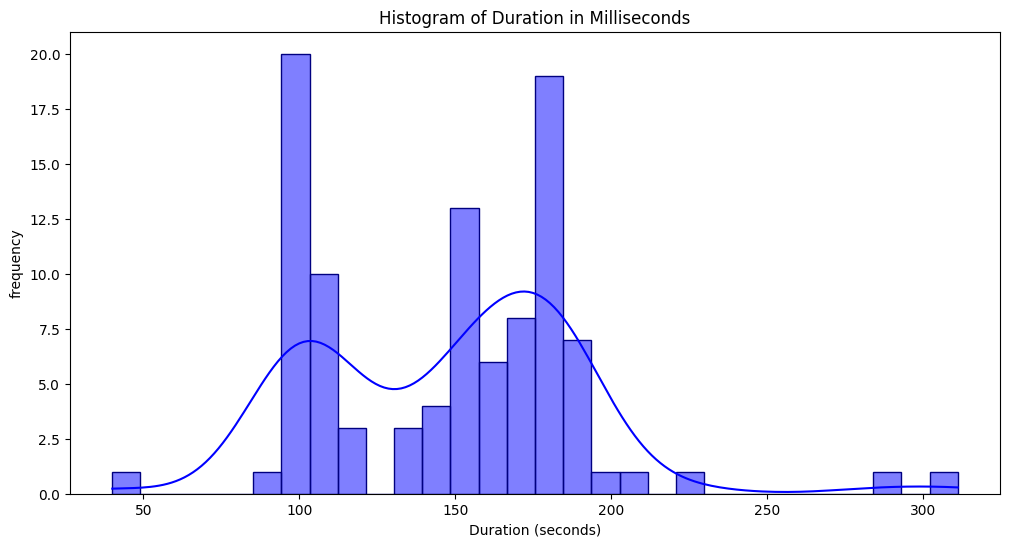

In [9]:
dataset = df['duration_ms'][10:110] / 1000
plt.figure(figsize=(12, 6))
sns.histplot(dataset, kde=True, bins=30, color='blue', edgecolor='navy')
plt.title('Histogram of Duration in Milliseconds')
plt.xlabel('Duration (seconds)')
plt.ylabel('frequency')
plt.show()

/tmp/ipython-input-10-1547069349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='tempo', data=df[25:40], palette='coolwarm')


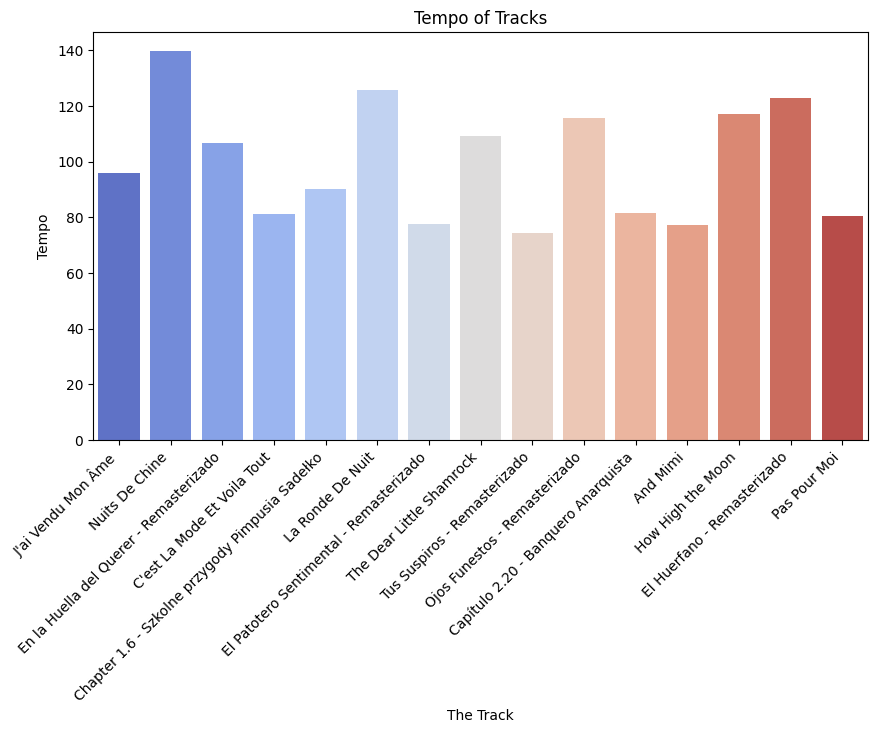

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='tempo', data=df[25:40], palette='coolwarm')
plt.gcf().autofmt_xdate()
plt.title('Tempo of Tracks')
plt.ylabel('Tempo')
plt.xlabel('The Track')
plt.xticks(rotation=45, ha='right')
plt.show()

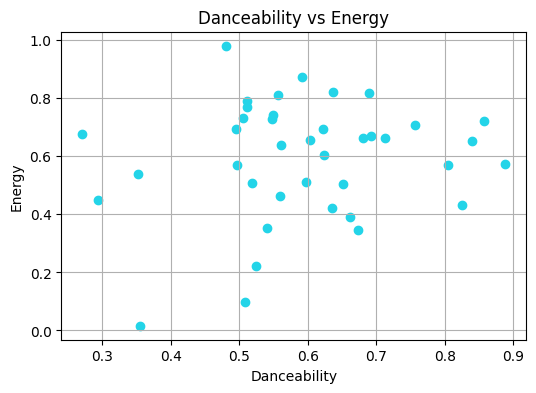

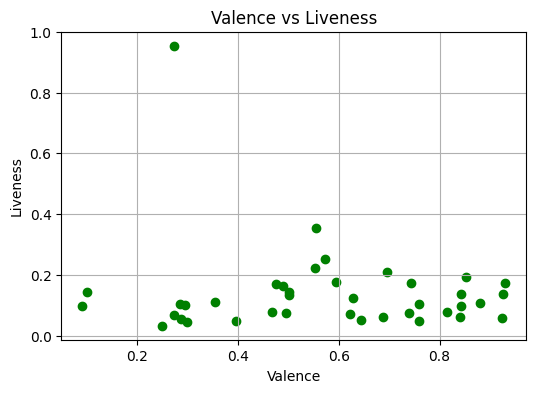

In [11]:
plt.figure(figsize=(6, 4))
plt.scatter(
    df['danceability'][63681:63720],
    df['energy'][63681:63720],
    color='#23d4e8'
)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs Energy')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    df['valence'][63681:63720],
    df['liveness'][63681:63720],
    color='green'
)
plt.xlabel('Valence')
plt.ylabel('Liveness')
plt.title('Valence vs Liveness')
plt.grid(True)
plt.show()

Adding new column 'popularity_category' that categorizes songs into 'Low', 'Medium', or 'High' based on their popularity score.

In [12]:
def popularity_category(popularity):
    if popularity <= 20:
        return 'Low'
    elif popularity <= 50:
        return 'Medium'
    else:
        return 'High'
df1['popularity_category'] = df1['popularity'].apply(popularity_category)
df1.loc[:, ['name', 'popularity', 'popularity_category']].tail(15)

,name,popularity,popularity_category
586657,The Cutest Puppy,67,High
586658,奉劝,48,Medium
586659,天空之外,49,Medium
586660,Edelweiss,65,High
586661,remember the mornings,67,High
586662,Meet Again,57,High
586663,四季予你 - DJ版,47,Medium
586664,同行 (新加坡電視劇《愛...沒有距離》主題曲),43,Medium
586665,John Brown's Song,66,High
586666,Skyscraper,4,Low


Adding a new column 'energy_level' that categorizes songs as 'low', 'medium', or 'high' based on their energy value.

In [13]:
def energy_level(energy):
    if energy <= 0.4:
        return 'Low'
    elif energy <= 0.6:
        return 'Medium'
    else:
        return 'High'

df1['energy_level'] = df1['energy'].apply(energy_level)
df1.loc[10000:10010, ['name', 'energy', 'energy_level']]

,name,energy,energy_level
10000,Evil,0.7030,High
10001,Kamariera,0.5110,Medium
10002,Caldonia,0.5720,Medium
10003,Cogote,0.2210,Low
10004,"Das ist bei uns nicht möglich, Kapitel 152",0.2150,Low
10005,"Das ist bei uns nicht möglich, Kapitel 69",0.2650,Low
10006,Chicken Rock - Remastered,0.9570,High
10007,"Beethoven: Piano Concerto No. 4 in G Major, Op...",0.2210,Low
10008,"Wagner: Die Walküre, WWV 86B, Act 2: ""Siegmund...",0.2410,Low
10009,"Haydn: String Quartet No. 6 in C Major, Op. 1 ...",0.0784,Low


Selecting specific columns from the dataframe, then normalizing the numerical features to a range between 0 and 1.

In [14]:
df2 = df1.drop(
    columns=['energy_level','id','name','artists','id_artists','release_date','popularity_category']).copy()
df_normalized = (df2 - df2.min()) / (df2.max() - df2.min())
df_normalized.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.06,0.021994,0.0,0.650858,0.4450,0.000000,0.713748,1.0,0.464470,0.676707,0.7440,0.151,0.127,0.425564,0.6
1,0.00,0.016885,0.0,0.701312,0.2630,0.000000,0.579173,1.0,0.985582,0.800201,0.0000,0.148,0.655,0.414029,0.2
2,0.00,0.031737,0.0,0.437941,0.1770,0.090909,0.593796,1.0,0.052729,0.997992,0.0218,0.212,0.457,0.529335,1.0
3,0.00,0.030895,0.0,0.323915,0.0946,0.636364,0.490073,1.0,0.051905,0.998996,0.9180,0.104,0.397,0.689907,0.6
4,0.00,0.028434,0.0,0.405651,0.1580,0.272727,0.659263,0.0,0.040165,0.992972,0.1300,0.311,0.196,0.418945,0.8


Calculating and displaying the correlation matrix for the numerical features in the dataframe.

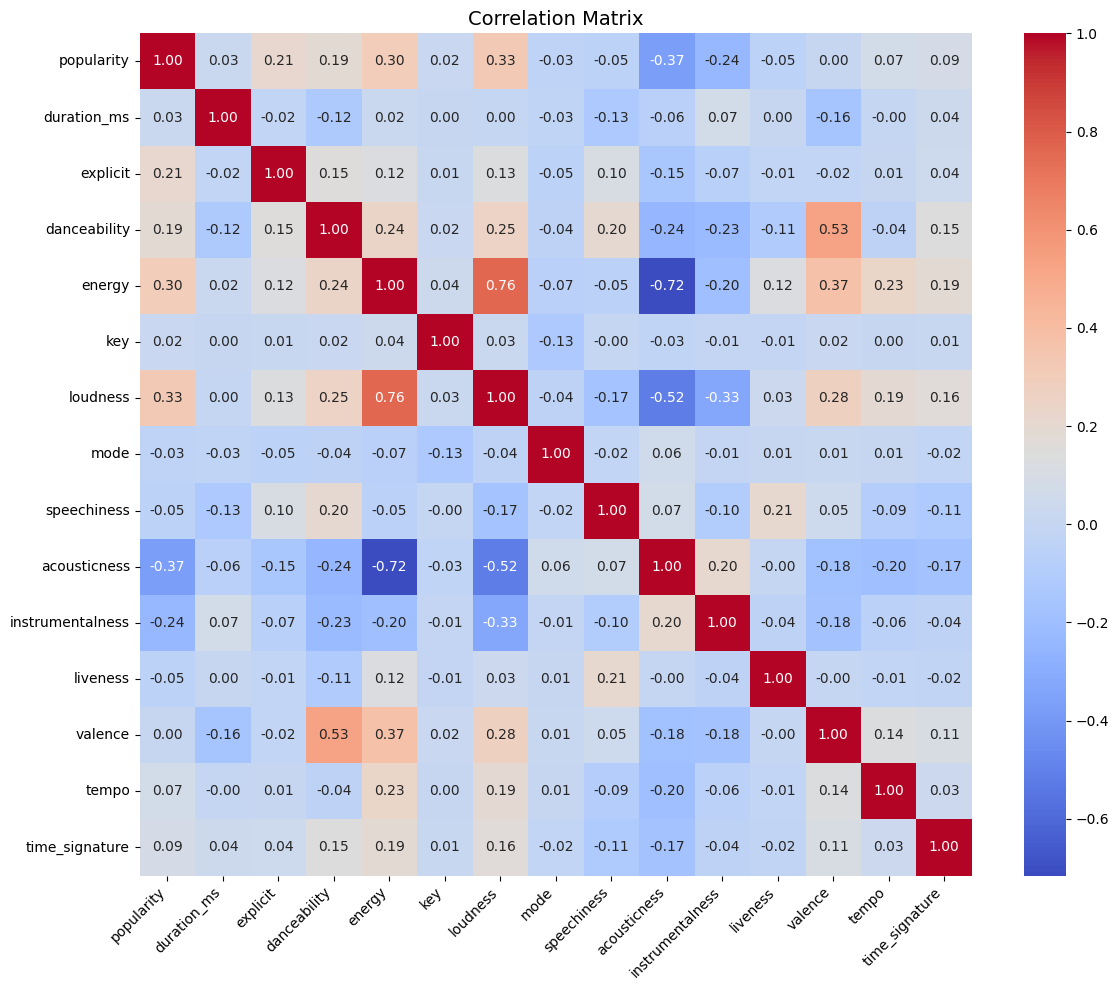

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_normalized.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,annot=True,fmt=".2f",cmap='coolwarm',annot_kws={"size": 10})
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

# Feature engineering

Encoding using label encoder

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder().fit_transform(df1['energy_level'])
label_encoded = LabelEncoder().fit_transform(df1['popularity_category'])
print("Label Encoded Data: \n", label_encoded)
df1['energy_level'] = LabelEncoder().fit_transform(df1['energy_level'])
df1['popularity_category'] = LabelEncoder().fit_transform(df1['popularity_category'])
df1[['name','artists','popularity','popularity_category','energy','energy_level']]


Label Encoded Data: 
 [1 1 1 ... 0 0 2]


,name,artists,popularity,popularity_category,energy,energy_level
0,Carve,['Uli'],6,1,0.4450,2
1,Capítulo 2.16 - Banquero Anarquista,['Fernando Pessoa'],0,1,0.2630,1
2,Vivo para Quererte - Remasterizado,['Ignacio Corsini'],0,1,0.1770,1
3,El Prisionero - Remasterizado,['Ignacio Corsini'],0,1,0.0946,1
4,Lady of the Evening,['Dick Haymes'],0,1,0.1580,1
...,...,...,...,...,...,...
586667,云与海,['阿YueYue'],50,2,0.5180,2
586668,blind,['ROLE MODEL'],72,0,0.6630,0
586669,What They'll Say About Us,['FINNEAS'],70,0,0.3140,1
586670,A Day At A Time,"['Gentle Bones', 'Clara Benin']",58,0,0.6150,0


Performing one-hot encoding on the 'energy_level' column

In [17]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoded = pd.get_dummies(df1['energy_level'])
print(one_hot_encoded)


            0      1      2
0       False  False   True
1       False   True  False
2       False   True  False
3       False   True  False
4       False   True  False
...       ...    ...    ...
586667  False  False   True
586668   True  False  False
586669  False   True  False
586670   True  False  False
586671   True  False  False

[586672 rows x 3 columns]


Train-Test Split

Splitting the dataset into 80% training and 20% testing using train_test_split() from sklearn.model_selection.


In [18]:
from sklearn.model_selection import train_test_split
X = df2
y = df1['popularity_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Features:\n", X_train)
print("Testing Features:\n", X_test)
print("Training Target:\n", y_train)
print("Testing Target:\n", y_test)

Training Features:
         popularity  duration_ms  explicit  ...  valence    tempo  time_signature
431626          21       206933         0  ...    0.675   90.241               4
481382          26       163600         0  ...    0.809   87.555               4
41728           47       149280         0  ...    0.864  123.288               4
419851          36       231288         0  ...    0.935  140.017               4
172826          52       294000         0  ...    0.196  136.882               4
...            ...          ...       ...  ...      ...      ...             ...
110268          44       246178         0  ...    0.481  143.908               4
259178          10       157013         0  ...    0.627  176.011               4
365838          33       188200         0  ...    0.593  111.417               4
131932          64       307000         1  ...    0.211   79.940               4
121958           0       195933         0  ...    0.132  125.702               4

[469337

# Regression


Train a Linear Regression model to predict the target variable.

Evaluate the model using:

1. Mean Squared Error (MSE)

2. Mean Absolute Error (MAE)

3. R² Score



In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.45705641931184077
Mean Absolute Error: 0.6061498391827038
R^2 Score: 0.034516226236223635


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss')
}

Calculating and printing several metrics to evaluate the performance of the regression model


In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.45705641931184077
Root Mean Squared Error: 0.6760594791228364
Mean Absolute Error: 0.6061498391827038
R^2 Score: 0.034516226236223635


Evaluating and comparing the performance of multiple machine learning models on a given dataset.

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}
results_df = pd.DataFrame(results).T
results_df

 Identifying and selecting the best-performing regression model based on the highest R-squared (R²) score.

In [ ]:
best_model_name=results_df["R2"].idxmax()
best_model=models[best_model_name]
best_model_name

'Logistic Regression'

Using a bar graph visualization to compare regression model performance, with bar heights representing R-squared (R²) scores. Higher bars indicate better-performing models.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'K-Nearest Neighbors'),
  Text(2, 0, 'Decision Tree'),
  Text(3, 0, 'Random Forest'),
  Text(4, 0, 'XGBoost')])

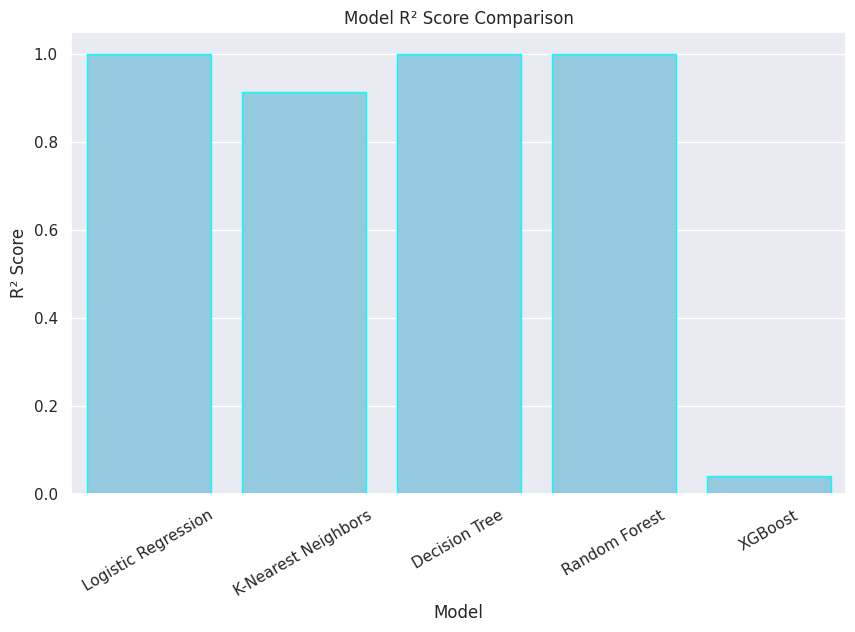

In [ ]:
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2'], color='skyblue', edgecolor='cyan')
plt.title('Model R² Score Comparison')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=30)